In [3]:
# Import libraries and load dataset
import os
import sys
import importlib
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

import common.common as common
importlib.reload(common)

df = pd.read_csv("Data.csv")

yr = list(df.yr)
df = df.set_index("yr")
df["yr"] = yr
df

,inbtou_volume,inbtou_volume_ov,inbtou_volume_sd,inbtou_spending,inbtou_spending_travel,inbtou_spending_transport,covid19_cases,covid19_deaths,covid19_mortality,yr
yr,,,,,,,,,,
2010,5260000.0,1370000.0,3890000.0,2.159000e+09,2.147000e+09,12000000.0,0,0,0.000000,2010
2011,5590000.0,1350000.0,4240000.0,2.157000e+09,2.142000e+09,15000000.0,0,0,0.000000,2011
2012,5940000.0,1420000.0,4520000.0,2.333000e+09,2.311000e+09,22000000.0,0,0,0.000000,2012
2013,6160000.0,1370000.0,4790000.0,2.305000e+09,2.285000e+09,20000000.0,0,0,0.000000,2013
2014,6320000.0,1450000.0,4870000.0,2.336000e+09,2.316000e+09,20000000.0,0,0,0.000000,2014
2015,6120000.0,1500000.0,4620000.0,2.554000e+09,2.537000e+09,17000000.0,0,0,0.000000,2015
2016,6270000.0,1500000.0,4770000.0,3.091000e+09,3.074000e+09,17000000.0,0,0,0.000000,2016
2017,6130000.0,1450000.0,4680000.0,2.951000e+09,2.930000e+09,21000000.0,0,0,0.000000,2017
2018,6620000.0,1630000.0,4990000.0,3.756000e+09,3.728000e+09,28000000.0,0,0,0.000000,2018


Estimated COVID-19 effect: -5179192 ± 252272 (95% confidence)


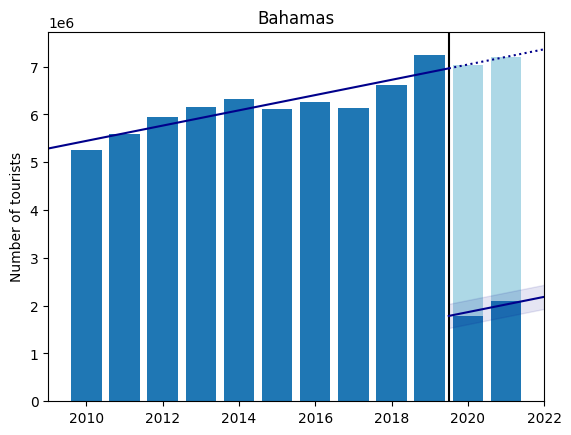

                            OLS Regression Results                            
Dep. Variable:      log_inbtou_volume   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     445.8
Date:                Wed, 26 Apr 2023   Prob (F-statistic):           3.07e-09
Time:                        03:02:14   Log-Likelihood:                 23.637
No. Observations:                  12   AIC:                            -39.27
Df Residuals:                       8   BIC:                            -37.34
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                -36

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [4]:
# Set up plot
plt.title('Bahamas')
plt.ylabel('Number of tourists')
plt.xlim(2009, 2022)
y_name = 'inbtou_volume'

# Filter out NaN data
_df = pd.DataFrame(df).loc[df[y_name].notna()]

# Generate difference-in-differences plot
effect, stderr = common.gen_did_plot(_df, y_name)
print(f"Estimated COVID-19 effect: {int(effect)} ± {int(stderr)} (95% confidence)")

# Render plot
plt.show()

# Run OLS regression
common.run_covid19_regression(_df, y_name, log_level=True)

Estimated COVID-19 effect: -1071566 ± 123964 (95% confidence)


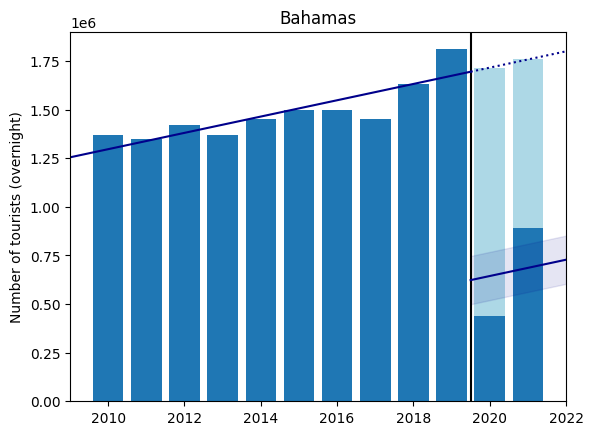

                             OLS Regression Results                             
Dep. Variable:     log_inbtou_volume_ov   R-squared:                       0.988
Model:                              OLS   Adj. R-squared:                  0.983
Method:                   Least Squares   F-statistic:                     218.6
Date:                  Wed, 26 Apr 2023   Prob (F-statistic):           5.17e-08
Time:                          03:02:54   Log-Likelihood:                 21.744
No. Observations:                    12   AIC:                            -35.49
Df Residuals:                         8   BIC:                            -33.55
Df Model:                             3                                         
Covariance Type:              nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercep

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [5]:
# Set up plot
plt.title('Bahamas')
plt.ylabel('Number of tourists (overnight)')
plt.xlim(2009, 2022)
y_name = 'inbtou_volume_ov'

# Filter out NaN data
_df = pd.DataFrame(df).loc[df[y_name].notna()]

# Generate difference-in-differences plot
effect, stderr = common.gen_did_plot(_df, y_name)
print(f"Estimated COVID-19 effect: {int(effect)} ± {int(stderr)} (95% confidence)")

# Render plot
plt.show()

# Run OLS regression
common.run_covid19_regression(_df, y_name, log_level=True)

Estimated COVID-19 effect: -4107626 ± 223648 (95% confidence)


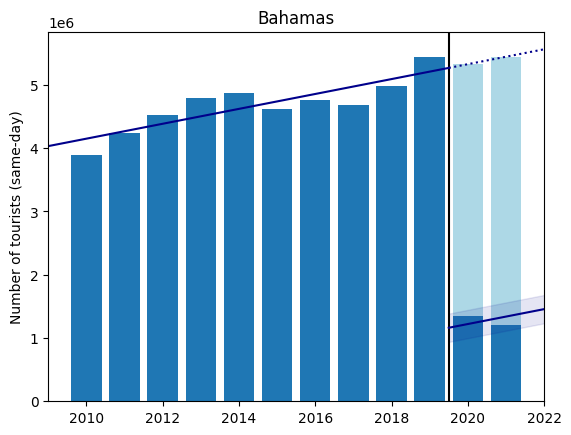

                             OLS Regression Results                             
Dep. Variable:     log_inbtou_volume_sd   R-squared:                       0.993
Model:                              OLS   Adj. R-squared:                  0.991
Method:                   Least Squares   F-statistic:                     395.2
Date:                  Wed, 26 Apr 2023   Prob (F-statistic):           4.95e-09
Time:                          03:03:15   Log-Likelihood:                 21.581
No. Observations:                    12   AIC:                            -35.16
Df Residuals:                         8   BIC:                            -33.22
Df Model:                             3                                         
Covariance Type:              nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercep

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [6]:
# Set up plot
plt.title('Bahamas')
plt.ylabel('Number of tourists (same-day)')
plt.xlim(2009, 2022)
y_name = 'inbtou_volume_sd'

# Filter out NaN data
_df = pd.DataFrame(df).loc[df[y_name].notna()]

# Generate difference-in-differences plot
effect, stderr = common.gen_did_plot(_df, y_name)
print(f"Estimated COVID-19 effect: {int(effect)} ± {int(stderr)} (95% confidence)")

# Render plot
plt.show()

# Run OLS regression
common.run_covid19_regression(_df, y_name, log_level=True)

Estimated COVID-19 effect: -2432465060 ± 400477482 (95% confidence)


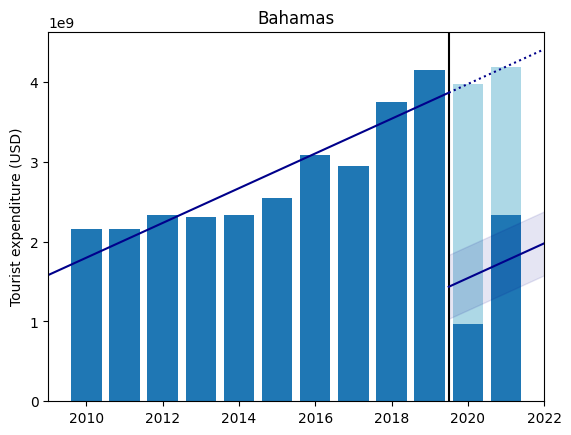

                             OLS Regression Results                            
Dep. Variable:     log_inbtou_spending   R-squared:                       0.958
Model:                             OLS   Adj. R-squared:                  0.942
Method:                  Least Squares   F-statistic:                     60.67
Date:                 Wed, 26 Apr 2023   Prob (F-statistic):           7.60e-06
Time:                         03:03:37   Log-Likelihood:                 14.666
No. Observations:                   12   AIC:                            -21.33
Df Residuals:                        8   BIC:                            -19.39
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept         

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [8]:
# Set up plot
plt.title('Bahamas')
plt.ylabel('Tourist expenditure (USD)')
plt.xlim(2009, 2022)
y_name = 'inbtou_spending'

# Filter out NaN data
_df = pd.DataFrame(df).loc[df[y_name].notna()]

# Generate difference-in-differences plot
effect, stderr = common.gen_did_plot(_df, y_name)
print(f"Estimated COVID-19 effect: {int(effect)} ± {int(stderr)} (95% confidence)")

# Render plot
plt.show()

# Run OLS regression
common.run_covid19_regression(_df, y_name, log_level=True)

Estimated COVID-19 effect: -2414108433 ± 399063622 (95% confidence)


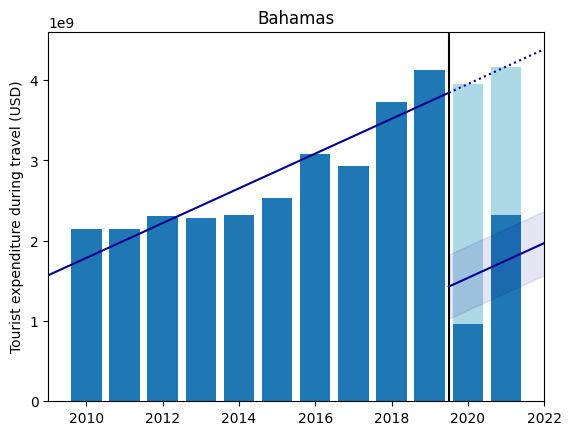

                                OLS Regression Results                                
Dep. Variable:     log_inbtou_spending_travel   R-squared:                       0.957
Model:                                    OLS   Adj. R-squared:                  0.941
Method:                         Least Squares   F-statistic:                     59.72
Date:                        Wed, 26 Apr 2023   Prob (F-statistic):           8.08e-06
Time:                                03:20:33   Log-Likelihood:                 14.583
No. Observations:                          12   AIC:                            -21.17
Df Residuals:                               8   BIC:                            -19.23
Df Model:                                   3                                         
Covariance Type:                    nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [13]:
# Set up plot
plt.title('Bahamas')
plt.ylabel('Tourist expenditure during travel (USD)')
plt.xlim(2009, 2022)
y_name = 'inbtou_spending_travel'

# Filter out NaN data
_df = pd.DataFrame(df).loc[df[y_name].notna()]

# Generate difference-in-differences plot
effect, stderr = common.gen_did_plot(_df, y_name)
print(f"Estimated COVID-19 effect: {int(effect)} ± {int(stderr)} (95% confidence)")

# Render plot
plt.show()

# Run OLS regression
common.run_covid19_regression(_df, y_name, log_level=True)

Estimated COVID-19 effect: -18356626 ± 3497760 (95% confidence)


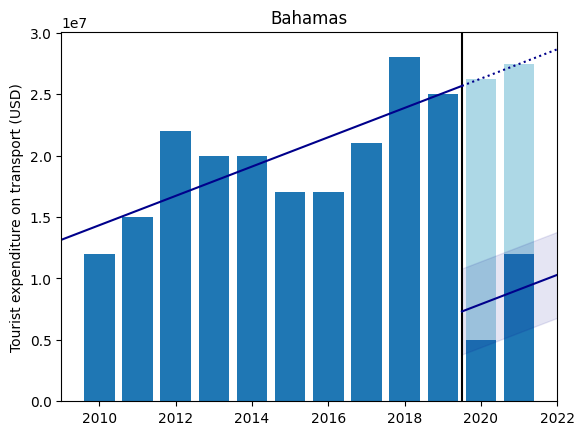

                                  OLS Regression Results                                 
Dep. Variable:     log_inbtou_spending_transport   R-squared:                       0.894
Model:                                       OLS   Adj. R-squared:                  0.854
Method:                            Least Squares   F-statistic:                     22.46
Date:                           Wed, 26 Apr 2023   Prob (F-statistic):           0.000298
Time:                                   03:20:35   Log-Likelihood:                 6.3277
No. Observations:                             12   AIC:                            -4.655
Df Residuals:                                  8   BIC:                            -2.716
Df Model:                                      3                                         
Covariance Type:                       nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
---------

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [14]:
# Set up plot
plt.title('Bahamas')
plt.ylabel('Tourist expenditure on transport (USD)')
plt.xlim(2009, 2022)
y_name = 'inbtou_spending_transport'

# Filter out NaN data
_df = pd.DataFrame(df).loc[df[y_name].notna()]

# Generate difference-in-differences plot
effect, stderr = common.gen_did_plot(_df, y_name)
print(f"Estimated COVID-19 effect: {int(effect)} ± {int(stderr)} (95% confidence)")

# Render plot
plt.show()

# Run OLS regression
common.run_covid19_regression(_df, y_name, log_level=True)